decision tree classification

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
data = pd.read_csv("swiggy.csv")
data.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [20]:
data = data[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']]

In [21]:
def create_user_rating(row):

    score = 0
    score += row['Avg ratings'] * 2
    score += min(row['Total ratings'] / 100, 5)
    score += max(0, (60 - row['Delivery time']) / 10)
    score += max(0, (500 - row['Price']) / 100)

    if score >= 10:
        return 1   
    else:
        return 0   

In [22]:
data['user_rating'] = data.apply(create_user_rating, axis=1)

In [23]:
data.sample(5)

,Price,Avg ratings,Total ratings,Delivery time,user_rating
8374,200.0,2.9,80,49,1
7634,200.0,2.9,80,68,0
733,300.0,4.1,20,59,1
7317,300.0,4.3,20,59,1
6517,250.0,4.4,1000,42,1


In [24]:
X = data[['Price', 'Avg ratings', 'Total ratings', 'Delivery time']]
y = data['user_rating']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)

In [27]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
y_pred = model.predict(X_test)
print("accureacy",accuracy_score(y_test,y_pred))

accureacy 0.9660138248847926


In [29]:
new_data = pd.DataFrame({
    'Price': [250],
    'Avg ratings': [4.2],
    'Total ratings': [180],
    'Delivery time': [35]
})
print(new_data)

   Price  Avg ratings  Total ratings  Delivery time
0    250          4.2            180             35


In [30]:
prediction = model.predict(new_data)
print("User Rating:", "Good" if prediction[0] == 1 else "Bad")

User Rating: Good


In [31]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 526   48]
 [  11 1151]]


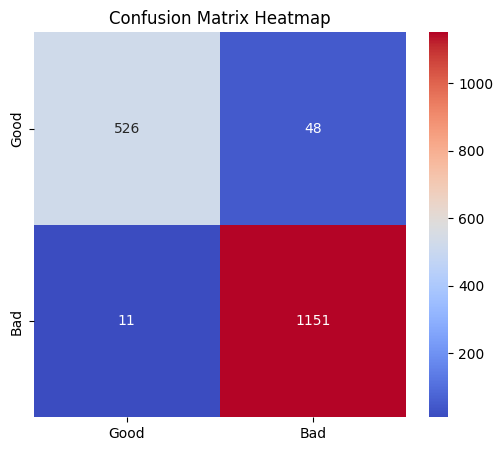

In [32]:
cm = confusion_matrix(y_test, y_pred)
class_names = ["Good", "Bad"]
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",              # shows integer values
    cmap="coolwarm",
    cbar=True,
    xticklabels=class_names,
    yticklabels=class_names
)
plt.title("Confusion Matrix Heatmap")
plt.show()